In [2]:
# Thamys Abrahao - 06/2018
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

# De qual forma os usuários mais fazem login no Passei Direto?

In [3]:
# Tipo de login
with open('students.json', 'r') as f:
    data = json.load(f)
    
df_students = pd.DataFrame(data)

In [4]:
df_students.head()

,City,CourseName,Id,RegisteredDate,SignupSource,State,StudentClient,UniversityName
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO
1,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,NaN,UFF
2,NaN,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,NaN,UNB
3,Resende,Engenharia de Produção Mecânica,15207697,2012-09-05 15:31:08.090000,Facebook,Rio de Janeiro,NaN,UERJ
4,NaN,Engenharia Elétrica,36988693,2012-10-15 21:34:51.143000,Facebook,NaN,NaN,UFU


In [5]:
# mudando o nome da coluna Id para StudentId
# para ficar em linha com as outras bases de dados

df_students.rename(columns={'Id':'StudentId'}, inplace=True)

In [6]:
print('shape', df_students.shape)
print('StudentId unicos', len(df_students['StudentId'].drop_duplicates().dropna()))

('shape', (60000, 8))
('StudentId unicos', 60000)


In [7]:
login = df_students.groupby('SignupSource')['StudentId'].count().reset_index()
login.columns = ['SignupSource', 'qnt']
login.sort_values(by='qnt', ascending=True, inplace=True)
login #['StudentId'].sum()

,SignupSource,qnt
0,Email,10294
2,Google,19555
1,Facebook,30151


In [8]:
login['porcentagem'] = (login['qnt'].apply(lambda x:
                                          100 * float(x)/login['qnt'].sum()))

In [9]:
login

,SignupSource,qnt,porcentagem
0,Email,10294,17.156667
2,Google,19555,32.591667
1,Facebook,30151,50.251667


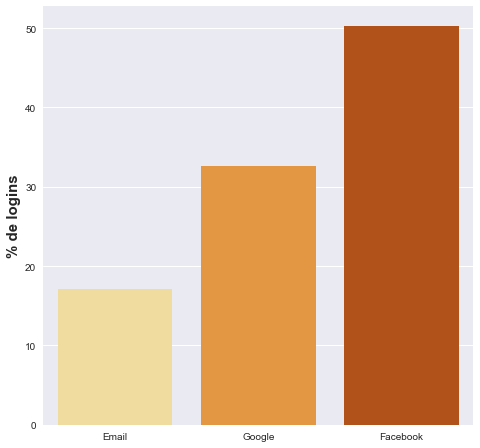

In [10]:
login_graph = sns.barplot(x='SignupSource', y='porcentagem', data=login, 
                         palette='YlOrBr')
plt.xlabel('', fontweight='bold', fontsize=15) 
plt.ylabel('% de logins', fontweight='bold', fontsize=15);
login_graph.figure.savefig('logins.png', dpi=100)

# Como os usuários preferem visualizar os arquivos? 

In [11]:
# Tipo de visualizações de arquivos
with open('fileViews.json', 'r') as f:
    data = json.load(f)
    
df_file = pd.DataFrame(data)

In [12]:
df_file.shape

(3028983, 4)

In [13]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028983 entries, 0 to 3028982
Data columns (total 4 columns):
FileName         object
StudentId        int64
Studentclient    object
ViewDate         object
dtypes: int64(1), object(3)
memory usage: 92.4+ MB


In [14]:
df_file.head()

,FileName,StudentId,Studentclient,ViewDate
0,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:03.047000
1,Exercicios Resolvidos do Halliday sobre Rotaçã...,12970655,Website,2017-02-23 10:46:12.370000
2,CALCULO I,12970655,Website,2017-05-25 22:39:48.000000
3,CALCULO I,12970655,Website,2017-05-25 22:40:36.000000
4,CALCULO I,12970655,Website,2017-05-25 22:43:16.000000


In [15]:
df_file.loc[:, 'Studentclient'] = df_file['Studentclient'].astype(str).str[:3] #.value_counts()

In [16]:
visualizacao = (df_file['Studentclient'].value_counts()
                .rename_axis('device').reset_index(name='qnt'))
visualizacao.sort_values(by='qnt', ascending=True, inplace=True)
visualizacao  #.sum()

,device,qnt
2,iOS,172781
1,And,863939
0,Web,1992263


In [17]:
visualizacao['porcentagem'] = (visualizacao['qnt'].apply(lambda x:
                                          100 * float(x)/visualizacao['qnt'].sum()))

In [18]:
visualizacao

,device,qnt,porcentagem
2,iOS,172781,5.704258
1,And,863939,28.522412
0,Web,1992263,65.773331


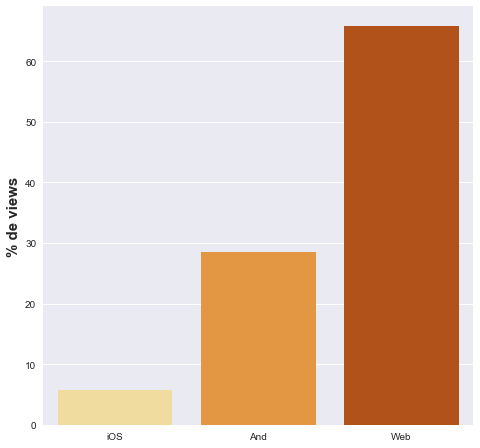

In [19]:
vis_graph = sns.barplot(x='device', y='porcentagem', data=visualizacao, 
                         palette='YlOrBr')

plt.xlabel('', fontweight='bold', fontsize=15)  
plt.ylabel('% de views', fontweight='bold', fontsize=15);
vis_graph.figure.savefig('views.png', dpi=100)

# Sessões

In [20]:
with open('sessions.json', 'r') as f:
    data = json.load(f)
    
df_sessions = pd.DataFrame(data)

In [21]:
df_sessions.shape

(1399062, 3)

In [22]:
df_sessions.head()

,SessionStartTime,StudentClient,StudentId
0,2017-02-20 14:51:37,Website,12970655
1,2017-02-22 14:04:34,Website,12970655
2,2017-02-23 13:46:14,Website,12970655
3,2017-02-23 14:52:24,Website,12970655
4,2017-03-03 20:47:21,Website,12970655


In [23]:
df_sessions.dtypes

SessionStartTime    object
StudentClient       object
StudentId            int64
dtype: object

In [24]:
df_sessions.loc[:, 'SessionStartTime'] = pd.to_datetime(df_sessions['SessionStartTime'])
df_sessions['date'] = df_sessions['SessionStartTime'].dt.normalize()
df_sessions['weekdayname'] = df_sessions['date'].dt.weekday_name

In [25]:
df_sessions.head()

,SessionStartTime,StudentClient,StudentId,date,weekdayname
0,2017-02-20 14:51:37,Website,12970655,2017-02-20,Monday
1,2017-02-22 14:04:34,Website,12970655,2017-02-22,Wednesday
2,2017-02-23 13:46:14,Website,12970655,2017-02-23,Thursday
3,2017-02-23 14:52:24,Website,12970655,2017-02-23,Thursday
4,2017-03-03 20:47:21,Website,12970655,2017-03-03,Friday


In [26]:
# somando as sessoes por dia
sessoes_por_dia = df_sessions.groupby('date')['StudentId'].count().reset_index()
sessoes_por_dia.columns = ['data', 'qnt']
sessoes_por_dia.sort_values(by='data', inplace=True)
sessoes_por_dia.tail()

,data,qnt
482,2018-06-04,4344
483,2018-06-05,4996
484,2018-06-06,4663
485,2018-06-07,4462
486,2018-06-08,831


In [27]:
sessoes_por_dia[sessoes_por_dia['qnt'] == 27657] #.max()

,data,qnt
288,2017-11-22,27657


In [28]:
sessoes_por_dia.set_index('data', inplace=True)
sessoes_por_dia.dtypes

qnt    int64
dtype: object

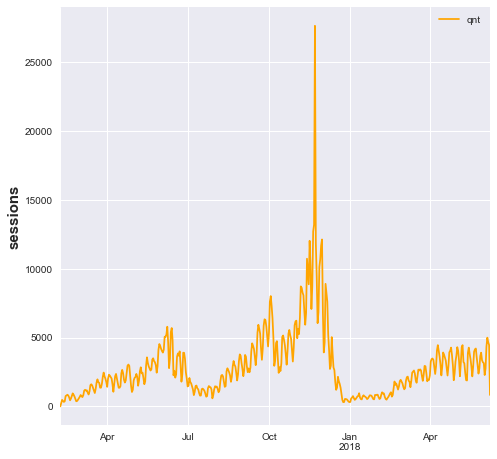

In [29]:
sessoes_por_dia.plot(color='orange');
plt.xlabel('', fontweight='bold', fontsize=15)  
plt.ylabel('sessions', fontweight='bold', fontsize=15);
plt.savefig('time_series.png', dpi=100)

In [30]:
# olhando por dia da semana

In [31]:
# somando as sessoes por dia da semana
sessoes_por_weekdia = df_sessions.groupby('weekdayname')['StudentId'].count().reset_index()
sessoes_por_weekdia.columns = ['dia_semana', 'qnt']
sessoes_por_weekdia.sort_values(by='qnt', inplace=True)
sessoes_por_weekdia.tail()

,dia_semana,qnt
0,Friday,175435
4,Thursday,212567
1,Monday,231674
5,Tuesday,241946
6,Wednesday,243044


In [32]:
sessoes_por_weekdia['porcentagem'] = (sessoes_por_weekdia['qnt'].apply(lambda x:
                                          100 * float(x)/sessoes_por_weekdia['qnt'].sum()))

In [33]:
sessoes_por_weekdia

,dia_semana,qnt,porcentagem
2,Saturday,134113,9.585923
3,Sunday,160283,11.456462
0,Friday,175435,12.539473
4,Thursday,212567,15.193537
1,Monday,231674,16.559238
5,Tuesday,241946,17.293444
6,Wednesday,243044,17.371925


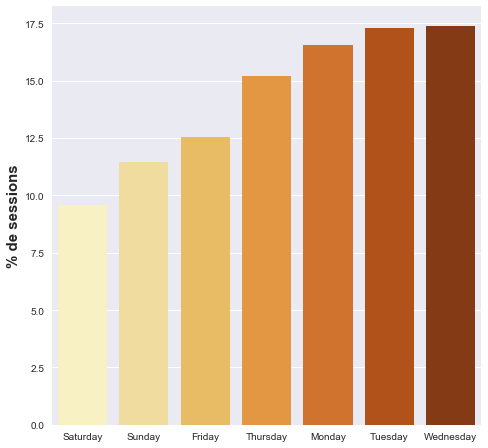

In [34]:
weekday_graph = sns.barplot(x='dia_semana', y='porcentagem', data=sessoes_por_weekdia, 
                         palette='YlOrBr')

plt.xlabel('', fontweight='bold', fontsize=15)  
plt.ylabel('% de sessions', fontweight='bold', fontsize=15);
weekday_graph.figure.savefig('weekday_graph.png', dpi=100)

# Olhando informações dos estudantes

Universidades e Curso mais representativos na base de estudantes (por enquanto ainda sem distinção de pagantes, não pagantes e churn)

In [35]:
df_students.head()

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO
1,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,NaN,UFF
2,NaN,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,NaN,UNB
3,Resende,Engenharia de Produção Mecânica,15207697,2012-09-05 15:31:08.090000,Facebook,Rio de Janeiro,NaN,UERJ
4,NaN,Engenharia Elétrica,36988693,2012-10-15 21:34:51.143000,Facebook,NaN,NaN,UFU


In [36]:
# Universidade
top_uni = df_students.groupby('UniversityName')['StudentId'].count().reset_index()
top_uni.columns = ['University', 'qnt']
top_uni.sort_values(by='qnt', ascending=False, inplace=True)
top_uni.head()

,University,qnt
178,ESTÁCIO,8919
1513,UNIP,4392
1590,UNOPAR,1784
1511,UNINTER,1780
179,ESTÁCIO EAD,1446


In [37]:
top_uni['porcentagem'] = (top_uni['qnt'].apply(lambda x:
                                          100 * float(x)/top_uni['qnt'].sum()))

In [38]:
# em termos do StudentId
top_uni5 = top_uni.head(10)
top_uni5

,University,qnt,porcentagem
178,ESTÁCIO,8919,14.865000
1513,UNIP,4392,7.320000
1590,UNOPAR,1784,2.973333
1511,UNINTER,1780,2.966667
179,ESTÁCIO EAD,1446,2.410000
1414,UNIDERP - ANHANGUERA,671,1.118333
33,Anhanguera,660,1.100000
1615,USP-SP,601,1.001667
1173,PITÁGORAS,556,0.926667
1315,UFRJ,530,0.883333


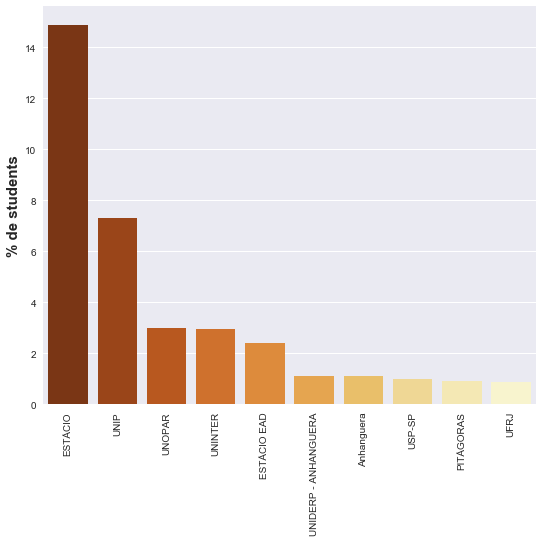

In [39]:
uni_graph = sns.barplot(x='University', y='porcentagem', data=top_uni5, 
                         palette='YlOrBr_r')

for tick in uni_graph.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel('', fontweight='bold', fontsize=15)  # Maybe add plan and type
plt.ylabel('% de students', fontweight='bold', fontsize=15);
plt.tight_layout()
uni_graph.figure.savefig('uni_graph.png', dpi=100)

In [40]:
# Cursos
top_cursos = df_students.groupby('CourseName')['StudentId'].count().reset_index()
top_cursos.columns = ['CourseName', 'qnt']
top_cursos.sort_values(by='qnt', ascending=False, inplace=True)
top_cursos.head()

,CourseName,qnt
100,Direito,9862
0,Administração,4099
139,Engenharia Civil,3585
85,Contabilidade / Ciências Contábeis,2744
363,Pedagogia,2627


In [41]:
top_cursos['porcentagem'] = (top_cursos['qnt'].apply(lambda x:
                                          100 * float(x)/top_cursos['qnt'].sum()))

In [42]:
top_cursos10 = top_cursos.head(10)
top_cursos10

,CourseName,qnt,porcentagem
100,Direito,9862,16.436667
0,Administração,4099,6.831667
139,Engenharia Civil,3585,5.975000
85,Contabilidade / Ciências Contábeis,2744,4.573333
363,Pedagogia,2627,4.378333
388,Psicologia,2155,3.591667
122,Enfermagem,2054,3.423333
340,Medicina,1656,2.760000
206,Fisioterapia,1464,2.440000
155,Engenharia Mecânica,1451,2.418333


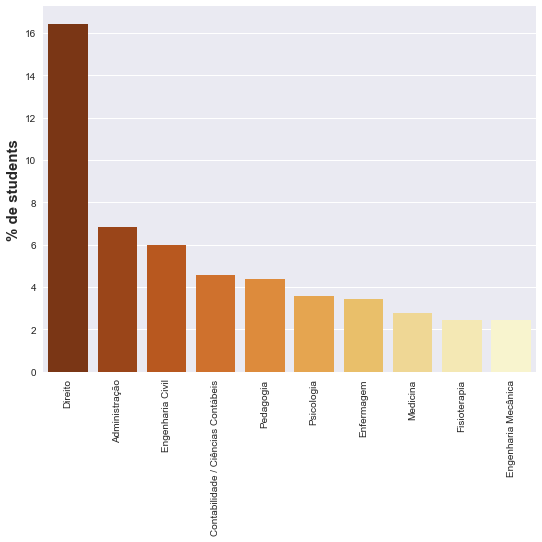

In [43]:
cursos_graph = sns.barplot(x='CourseName', y='porcentagem', data=top_cursos10, 
                         palette='YlOrBr_r')


for tick in cursos_graph.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel('', fontweight='bold', fontsize=15)  
plt.ylabel('% de students', fontweight='bold', fontsize=15);
plt.tight_layout()
cursos_graph.figure.savefig('cursos_graph.png', dpi=100)